<a href="https://colab.research.google.com/github/Eesha0412/Plant-Disease-Detection/blob/main/Visualisation%20and%20Complex%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/PlantVillage.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/val/Soybean___healthy/55ed6b1f-9baf-45d9-b4b4-4f19c7dc271a___RS_HL 7312.JPG  
  inflating: PlantVillage/val/Soybean___healthy/561d3eaf-4ff0-4580-9958-55494bf3a88b___RS_HL 6420.JPG  
  inflating: PlantVillage/val/Soybean___healthy/56486310-1cd5-4fb4-9fb8-01f60417f64f___RS_HL 6258.JPG  
  inflating: PlantVillage/val/Soybean___healthy/56a8722c-1acf-4f63-ba8c-66df35f47791___RS_HL 6311.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5735f9f8-b5a4-42b4-b093-1e323323dfa2___RS_HL 3224.JPG  
  inflating: PlantVillage/val/Soybean___healthy/5755b898-21db-4c7f-8d5a-3401e8478192___RS_HL 4530.JPG  
  inflating: PlantVillage/val/Soybean___healthy/578f7dd6-55ae-4fb3-8f79-3ee460250ea7___RS_HL 2784.JPG  
  inflating: PlantVillage/val/Soybean___healthy/57afa416-2cfd-49d0-9674-e59b7955648c___RS_HL 3367.JPG  
  inflating: PlantVillage/val/Soybean___healthy/57bac195-757a-4570-91fd-0da80dedc800___RS_HL 6641.JPG  
  inflating: 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
os.listdir('/content/PlantVillage/train')

['Peach___healthy',
 'Grape___Black_rot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Target_Spot',
 'Tomato___Bacterial_spot',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Cherry_(including_sour)___healthy',
 'Potato___Early_blight',
 'Peach___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Grape___healthy',
 'Apple___Apple_scab',
 'Blueberry___healthy',
 'Potato___Late_blight',
 'Tomato___Late_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Apple___healthy',
 'Apple___Black_rot',
 'Raspberry___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Soybean___healthy',
 'Tomato___Early_blight',
 'Grape___Esca_(Black_Measles)',
 'Squash___Powdery_mildew',
 'Cherry_(including_sour)___

In [ ]:
len(os.listdir('/content/PlantVillage/train'))

39

In [ ]:
len(os.listdir('/content/PlantVillage/val'))

39

In [ ]:
list_diseases = os.listdir('/content/PlantVillage/train')

In [ ]:
list_diseases_val = os.listdir('/content/PlantVillage/val')

In [ ]:
results2 = []
for disease in list_diseases:
    dies_name_count = {}
    count_disease = len(os.listdir(f'/content/PlantVillage/train/{disease}'))
    dies_name_count['disease'] = disease
    dies_name_count['count_images'] = count_disease
    results2.append(dies_name_count)

In [ ]:
results3 = []
for disease in list_diseases:
    dies_name_count = {}
    count_disease = len(os.listdir(f'/content/PlantVillage/val/{disease}'))
    dies_name_count['disease'] = disease
    dies_name_count['count_images'] = count_disease
    # total=total+count_images
    results3.append(dies_name_count)

In [ ]:
results = pd.DataFrame(results2)
results

,disease,count_images
0,Peach___healthy,288
1,Grape___Black_rot,944
2,Tomato___Spider_mites Two-spotted_spider_mite,1341
3,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),861
4,Apple___Cedar_apple_rust,220
5,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,410
6,Tomato___Target_Spot,1123
7,Tomato___Bacterial_spot,1702
8,Corn_(maize)___healthy,929
9,Corn_(maize)___Northern_Leaf_Blight,788


In [ ]:
results_val = pd.DataFrame(results3)
results_val

,disease,count_images
0,Peach___healthy,72
1,Grape___Black_rot,236
2,Tomato___Spider_mites Two-spotted_spider_mite,335
3,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),215
4,Apple___Cedar_apple_rust,55
5,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,103
6,Tomato___Target_Spot,281
7,Tomato___Bacterial_spot,425
8,Corn_(maize)___healthy,233
9,Corn_(maize)___Northern_Leaf_Blight,197


In [ ]:
#just to check
len(os.listdir('/content/PlantVillage/train/Apple___healthy'))

1316

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

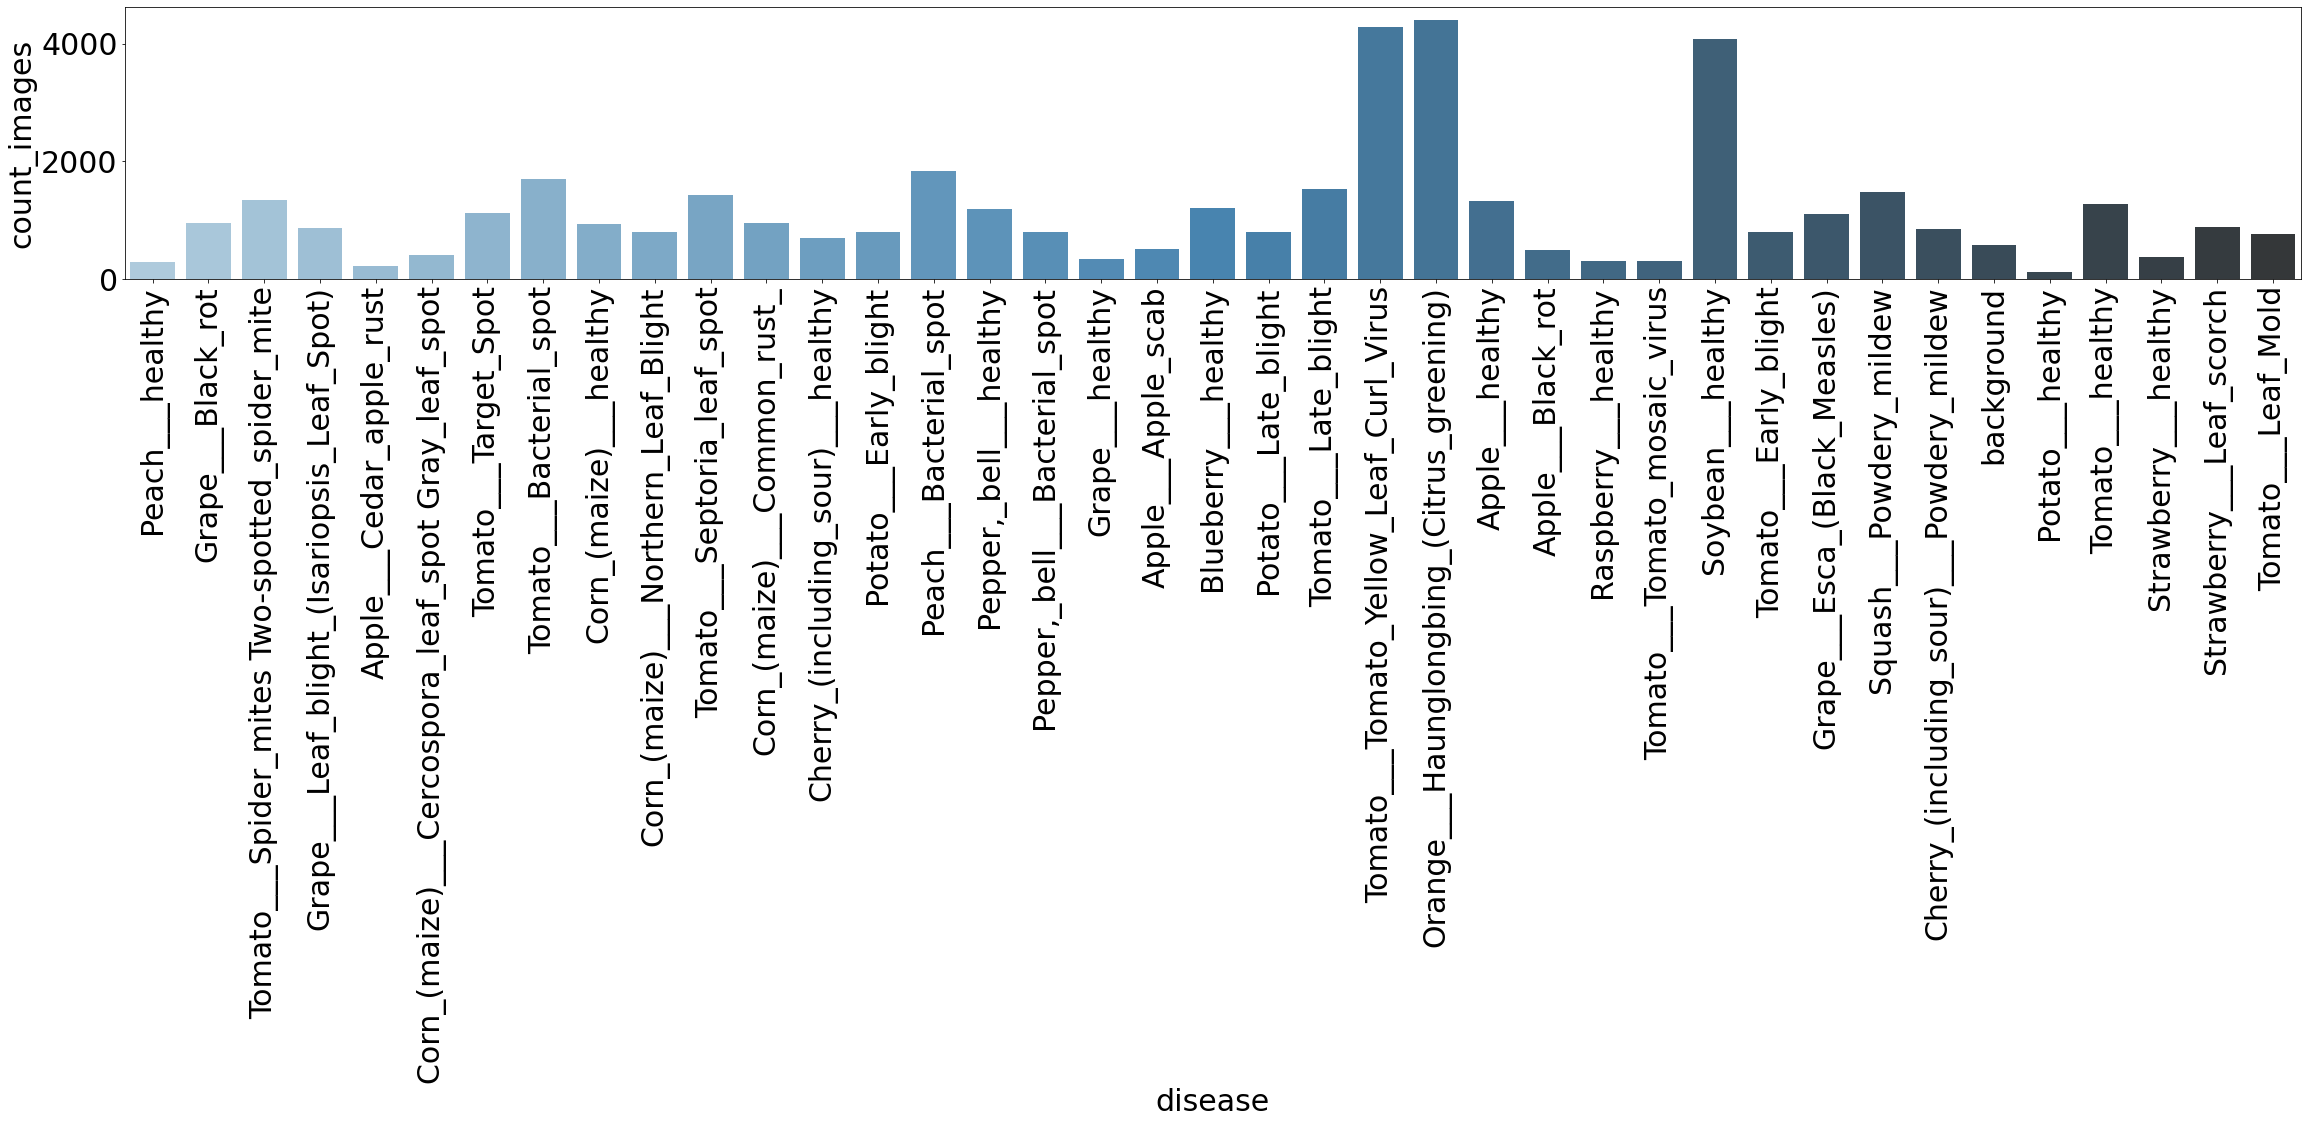

In [ ]:
plt.figure(figsize=(39,5))
plt.rcParams.update({'font.size': 30})
sns.barplot(x='disease', y = 'count_images', data= results, palette='Blues_d')
plt.xticks(rotation=90)
plt.show() 

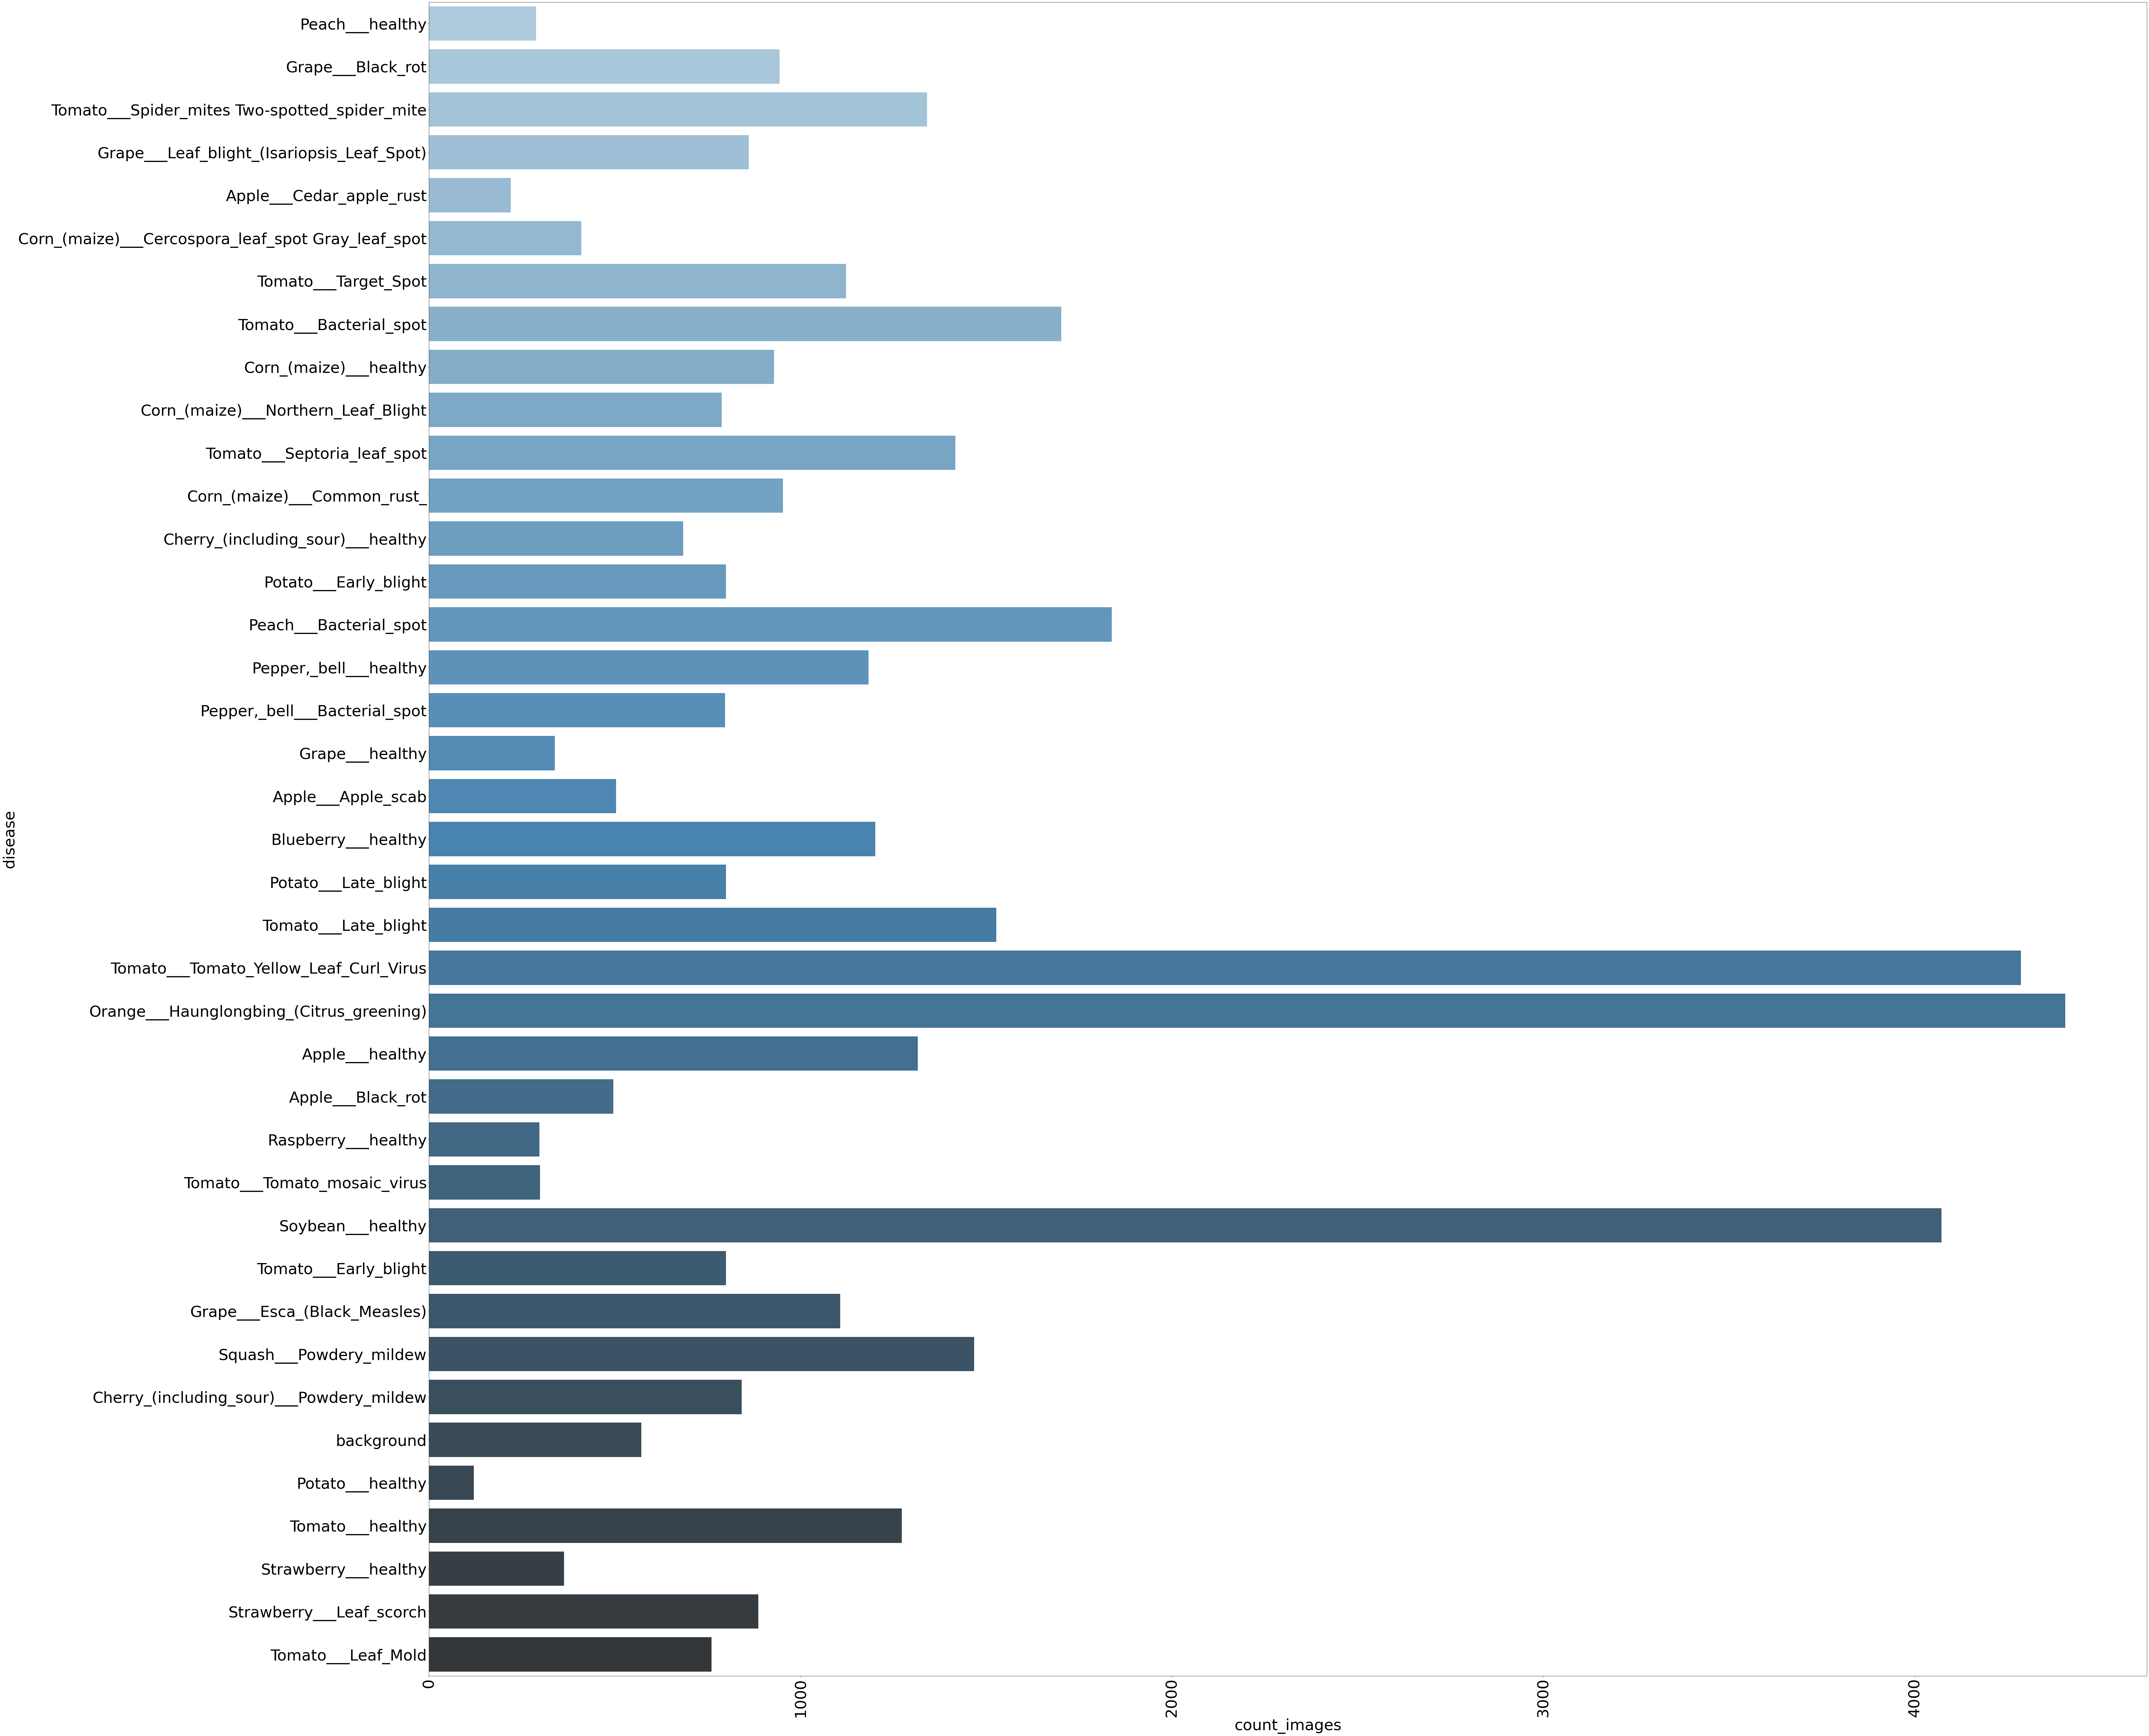

In [ ]:
plt.figure(figsize=(100,100))
plt.rcParams.update({'font.size': 50})
sns.barplot(x='count_images', y = 'disease', data= results, palette='Blues_d',orient = 'h')
plt.xticks(rotation=90)
plt.show() 

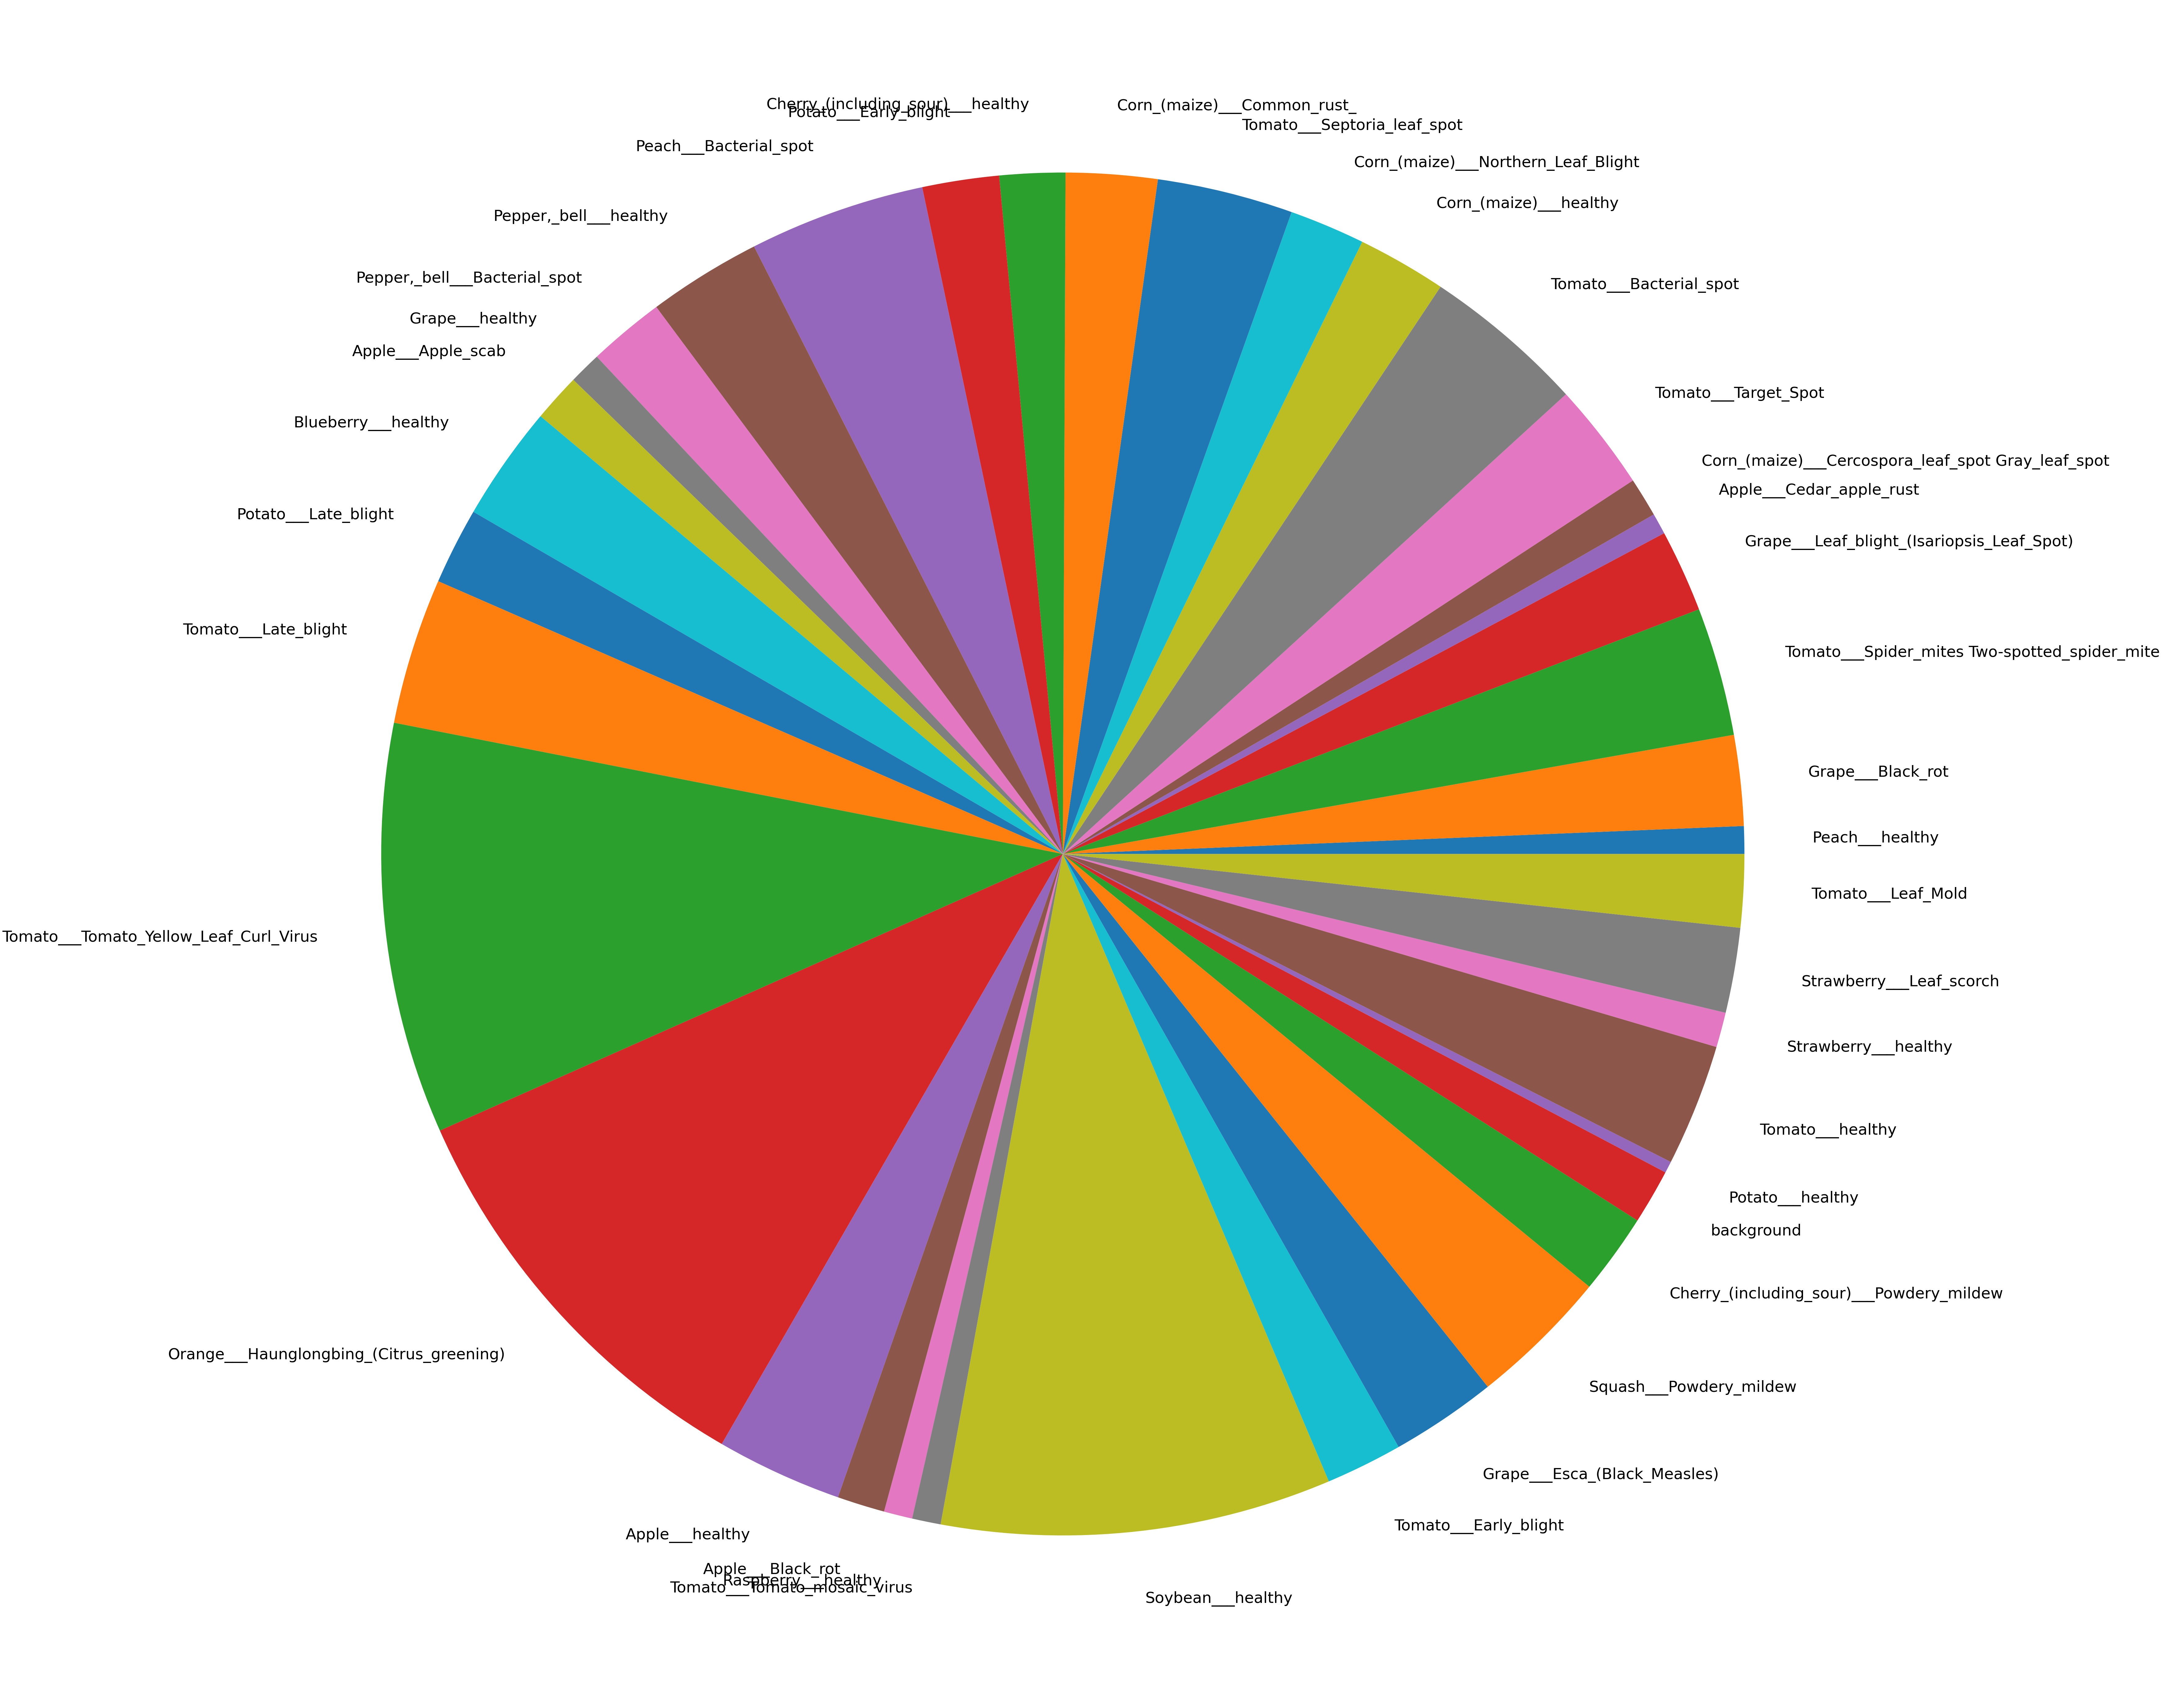

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure(figsize =(100,102))
plt.pie(results['count_images'], labels = results['disease'])
# show plot
plt.show()

In [ ]:
pip install opencv-python

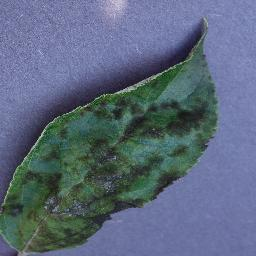

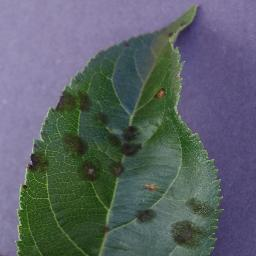

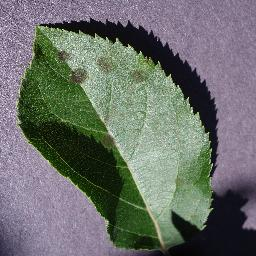

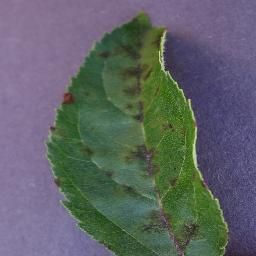

In [ ]:
import random
import cv2
from matplotlib import pyplot as plt
import numpy as np
!pip install opencv-python
from google.colab.patches import cv2_imshow
directory = ('/content/PlantVillage/train/Apple___Apple_scab')
for i in range(4):
  filename=random.choice(os.listdir(directory))
  path = os.path.join(directory, filename)
  img=cv2.imread(path,cv2.IMREAD_COLOR)
  cv2_imshow(img)

# Complex CNN


In [ ]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((144, 144))

# Number of images used to train the model
# N_IMAGES = 100

# Path to the dataset folder
root_dir = '/content/PlantVillage'

train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:100]:
            image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()

# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")

[INFO] Loading images ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Squash___Powdery_mildew ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Pepper,_bell___Bacterial_spot ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Peach___Bacterial_spot ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing background ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Cherry_(including_sour)___healthy ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Apple___healthy

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)

Total number of classes:  39


In [ ]:
# augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
#                              height_shift_range=0.1, shear_range=0.2, 
#                              zoom_range=0.2, horizontal_flip=True, 
#                              fill_mode="nearest")

In [ ]:
print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Splitting data to train and test...


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [ ]:
model = Sequential()
# inputShape = (HEIGHT, WIDTH, DEPTH)
# chanDim = -1

# if K.image_data_format() == "channels_first":
#     inputShape = (DEPTH, HEIGHT, WIDTH)
#     chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=(144,144,3)))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 32)      896       
                                                                 
 activation (Activation)     (None, 144, 144, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0         
                                                        

In [ ]:
adam = Adam(0.001)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
98/98 [==============================] - 191s 2s/step - loss: 0.3490 - accuracy: 0.0776 - val_loss: 0.1181 - val_accuracy: 0.0526
Epoch 2/5
98/98 [==============================] - 184s 2s/step - loss: 0.0925 - accuracy: 0.3189 - val_loss: 0.1213 - val_accuracy: 0.1321
Epoch 3/5
98/98 [==============================] - 186s 2s/step - loss: 0.0778 - accuracy: 0.4474 - val_loss: 0.1220 - val_accuracy: 0.2115
Epoch 4/5
98/98 [==============================] - 200s 2s/step - loss: 0.0685 - accuracy: 0.5276 - val_loss: 0.1010 - val_accuracy: 0.4603
Epoch 5/5
98/98 [==============================] - 184s 2s/step - loss: 0.0601 - accuracy: 0.6115 - val_loss: 0.0674 - val_accuracy: 0.5526


In [ ]:
adam = Adam(0.001)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
98/98 [==============================] - 179s 2s/step - loss: 0.0547 - accuracy: 0.6513 - val_loss: 0.0490 - val_accuracy: 0.6577
Epoch 2/5
98/98 [==============================] - 177s 2s/step - loss: 0.0472 - accuracy: 0.7205 - val_loss: 0.0497 - val_accuracy: 0.6718
Epoch 3/5
98/98 [==============================] - 177s 2s/step - loss: 0.0436 - accuracy: 0.7452 - val_loss: 0.0613 - val_accuracy: 0.6769
Epoch 4/5
98/98 [==============================] - 173s 2s/step - loss: 0.0384 - accuracy: 0.7913 - val_loss: 0.0465 - val_accuracy: 0.6910
Epoch 5/5
98/98 [==============================] - 176s 2s/step - loss: 0.0338 - accuracy: 0.8183 - val_loss: 0.0467 - val_accuracy: 0.6705


In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)
y_pred=y_pred>0.5
y_pred = y_pred.astype(int)
report=classification_report(y_test, y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.93      0.57      0.70        23
           2       0.75      0.57      0.65        21
           3       0.56      0.29      0.38        17
           4       0.53      0.96      0.68        27
           5       0.69      0.56      0.62        16
           6       1.00      0.32      0.48        25
           7       0.72      0.72      0.72        18
           8       1.00      1.00      1.00        20
           9       0.80      0.75      0.77        16
          10       1.00      1.00      1.00        13
          11       1.00      0.32      0.48        25
          12       0.67      0.71      0.69        17
          13       0.62      0.93      0.74        14
          14       1.00      0.86      0.92        21
          15       0.93      0.50      0.65        28
          16       0.67      0.73      0.70        11
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# _, train_acc = model.evaluate(np_image_list, image_labels, verbose=0)
_, test_acc = model.evaluate(np_image_list, image_labels, verbose=0)
print(test_acc)

0.8087179660797119


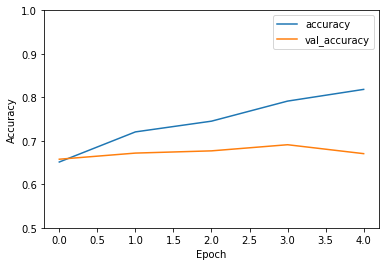

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')